<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_01_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Desarrollo del Laboratorio 1.0:** 

Dataset: Precio eurd/usd 

Por: Juliana del Valle Pérez 

correo: juliana.delvalle1@udea.edu.co



# Laboratorio 1.0:

## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


7. Para el data frame, seleccionemos solo los datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```

## 0. Librerías 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

## 1.Leer el dataset desde el github.

In [1]:
path = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv"

In [4]:
df = pd.read_csv(f"{path}") 

## 2. Definir como indice la columna time.

In [5]:
#Redefine el indice
df.index = pd.to_datetime(df.time) #Columna del tiempo en una serie de tiempo se hace el indice

#quita la columna del indice anterior
df = df.drop(axis=1, columns = "time")

df = df.drop(columns="Unnamed: 0")
df.head()

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


## Información del data frame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                5000 non-null   float64
 1   high                5000 non-null   float64
 2   low                 5000 non-null   float64
 3   close               5000 non-null   float64
 4   tick_volume         5000 non-null   int64  
 5   spread              5000 non-null   int64  
 6   real_volume         5000 non-null   int64  
 7   MeanCloseOpen       5000 non-null   float64
 8   Diff_Close          5000 non-null   float64
 9   Diff_Open           5000 non-null   float64
 10  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 468.8 KB


In [7]:
df.count() #cuente los datos no nulos por coulumnas

open                  5000
high                  5000
low                   5000
close                 5000
tick_volume           5000
spread                5000
real_volume           5000
MeanCloseOpen         5000
Diff_Close            5000
Diff_Open             5000
Diff_MeanCloseOpen    5000
dtype: int64

In [8]:
df.describe()

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.043891,1.044815,1.042991,1.043906,3690.249400,8.981600,0.0,1.043898,0.000012,0.000012,0.000012
std,0.041135,0.040991,0.041263,0.041135,2800.488505,5.785115,0.0,0.041129,0.001400,0.001404,0.000978
min,0.953910,0.955930,0.953570,0.953910,85.000000,0.000000,0.0,0.954735,-0.013970,-0.014010,-0.007260
25%,1.002718,1.003507,1.001715,1.002705,1738.750000,8.000000,0.0,1.002648,-0.000580,-0.000600,-0.000425
50%,1.055670,1.056795,1.054960,1.055700,2999.500000,8.000000,0.0,1.055712,-0.000005,0.000000,0.000005
75%,1.078940,1.079582,1.078222,1.078947,4861.000000,8.000000,0.0,1.078955,0.000620,0.000612,0.000430
max,1.108470,1.109530,1.108050,1.108500,23708.000000,183.000000,0.0,1.108280,0.017340,0.017420,0.010780


## Datos null o nan en el data frame.

In [9]:
#cuenta los valores que son nulos por columna
df.isnull().sum()

open                  0
high                  0
low                   0
close                 0
tick_volume           0
spread                0
real_volume           0
MeanCloseOpen         0
Diff_Close            0
Diff_Open             0
Diff_MeanCloseOpen    0
dtype: int64

In [10]:
#cuenta los valores que son nulos por columna
df.isna().sum()

open                  0
high                  0
low                   0
close                 0
tick_volume           0
spread                0
real_volume           0
MeanCloseOpen         0
Diff_Close            0
Diff_Open             0
Diff_MeanCloseOpen    0
dtype: int64

No tiene valores nan ni nul

## Notacion Pascal Case 

In [11]:
df.columns #Imprime el nombre de las columnas

Index(['open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume',
       'MeanCloseOpen', 'Diff_Close', 'Diff_Open', 'Diff_MeanCloseOpen'],
      dtype='object')

In [12]:
def ConviertePascalCase(columnas):
    dic = {}
    for col in columnas:
        nombrePascal = list(map(lambda x: x.capitalize(),  col.split("_"))) # Lista con las palabras capitalizadas
        nombrePascal = " ".join(nombrePascal) # Junta las plabras por espacio
        dic[col] = nombrePascal
    return dic

In [13]:
#notación pascal case
df = df.rename(columns= ConviertePascalCase(df.columns))

##  Diferencia de precio entre horas

In [14]:
#Añade la columna de las diferencias entre los precios
df["Diffprice"] = df["Close"].diff(1) #diferencia por horas

# Define un nuevo Dataframe con los precios de Close y la diferencia de los precios
df_precios = df.get(["Close", "Diffprice"])

# Elimina los valores nulos
df_precios = df_precios.dropna()

df_precios.head()

,Close,Diffprice
time,,
2022-07-25 14:00:00,1.02299,-0.00046
2022-07-25 15:00:00,1.02457,0.00158
2022-07-25 16:00:00,1.02485,0.00028
2022-07-25 17:00:00,1.02181,-0.00304
2022-07-25 18:00:00,1.02099,-0.00082


## Histograma de las diferencias de precios.

[Text(0.5, 0, '$\\Delta P$'), Text(0, 0.5, 'F')]

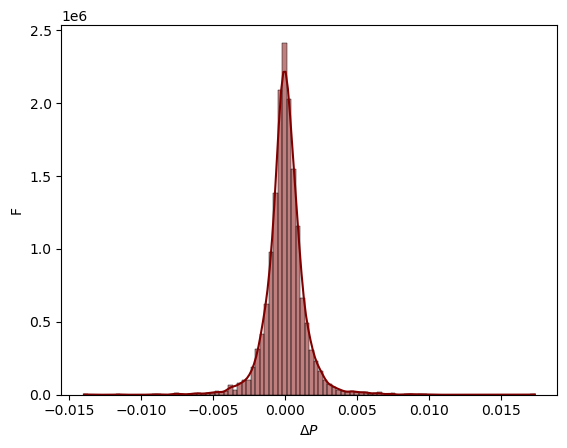

In [15]:
fig, ax = plt.subplots()

sns.histplot(df_precios["Diffprice"], kde= True, bins=100, stat = 'frequency', ax=ax, color="maroon")

ax.set(xlabel = "$\Delta P$", ylabel = "F")

## La mejor distribucion estadística de las diferencias de los precios

{'lognorm': {'s': 0.009509964461157715,
  'loc': -0.1471693008245066,
  'scale': 0.14717494036949658}}

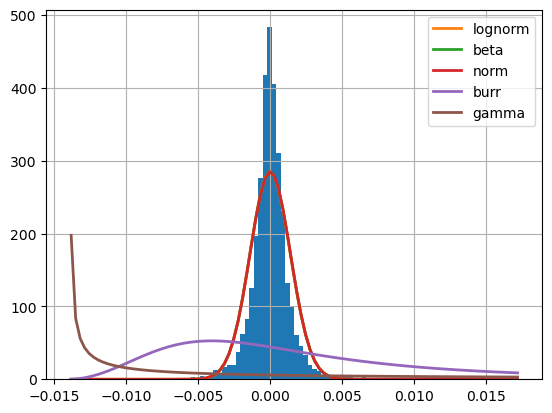

In [16]:
#Doc:Fitter
#Fitter(datos, xmin, xmax, bins, distributions, timeout, density)
#Given a data sample, we use the `fit` method of SciPy to extract the parameters
#of that distribution that best fit the data. We repeat this for all available distributions.
#Finally, we provide a summary so that one can see the quality of the fit for those distributions
f = Fitter(df_precios["Diffprice"],
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
    
                          "norm"])

#Recorre sobre las distribuciones para encontrar los parametros que mejor modelan los datos 
#para cada distribucion
f.fit()

#meth:`summary` method returns a sorted dataframe where
#the index represents the distribution names.
#Plots the distribution of the data and N best distributions
f.summary()

#Indentificamos la mejor distribucion con el error cuadratico medio
#Return best fitted distribution and its parameters
f.get_best(method = 'sumsquare_error')


Por lo que se concluye que la mejor es la Lognormal con media $\approx -0.15$ y desviación estandar $\approx 0.15$

## Histogramas de las diferencias de precios por mes

In [20]:
# Serie de tiempo con las diferencias de precios en el año 2023
ts_2023 = df_precios.loc["2023"].Diffprice

# Agrupa los datos por mes usando el método resample()
# Según la documentación resample() es un gruopby basado en el tiempo.
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling
ts_2023_meses = ts_2023.resample("M")


# Etiquetas que resample le asigna a casa mes. 
# cada entrada es un objeto de tipo Timestamp, correspondiente al tiempo desde el que se parte el grupo.
meses_etiquetas = list(ts_2023_meses.groups.keys())


In [25]:
#Función que grafica el histograma de una serie de tiempos con las diferencias de precios
def histograma_precios(serie_tiempo, mes):
    
    meses_nombres = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", 
                 "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

    paleta_colores = plt.cm.tab20(np.linspace(0, 1, 12)) #hay 12 meses
    
    fig, ax = plt.subplots()

    
    # Resta 1 a mes para que empiece el conteo en 0
    sns.histplot(serie_tiempo, kde= True, bins=100, stat = 'percent', ax=ax, 
                 color=paleta_colores[mes-1])

    ax.set(xlabel = "$\Delta P$", ylabel = "Porcentaje", title = meses_nombres[mes-1])


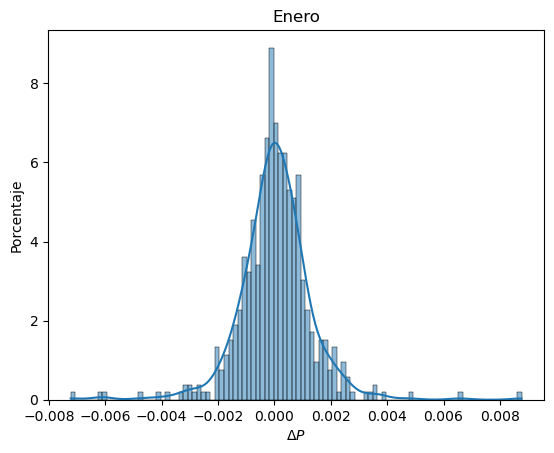

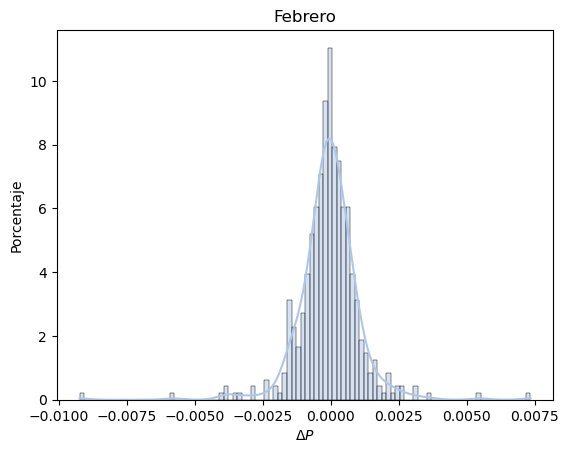

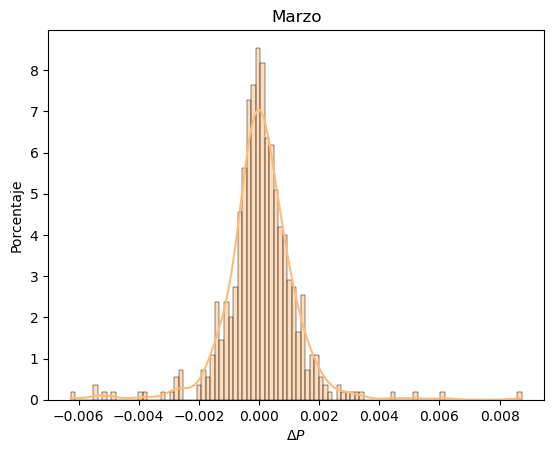

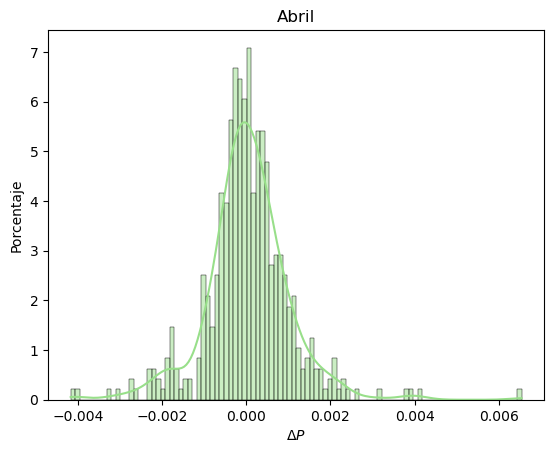

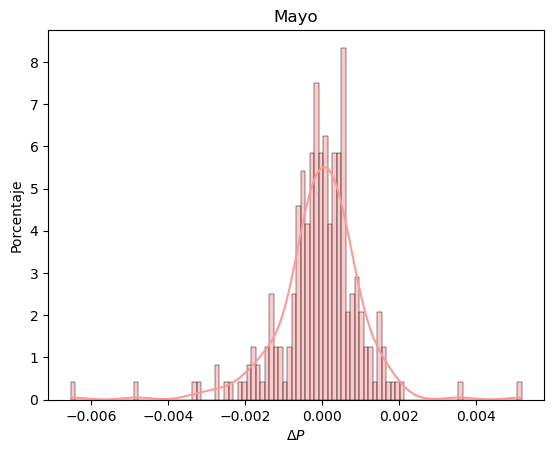

In [26]:
for mes in meses_etiquetas:
    histograma_precios(ts_2023_meses.get_group(mes), int(mes.month))